In [1]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results

from tools.simple_track_generator import trackGenerator

In [2]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.a_d_max = 2
simulator.delta_d_max = 0.12
simulator.use_saved_data = False
simulator.save_data = False
simulator.simulate_model_type = ModelType.DYNAMIC
simulator.data_model_type = ModelType.DYNAMIC
simulator.filter_model_type = ModelType.DYNAMIC
simulator.t_sim = 12.0
simulator.num_predicted_traj = 10
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.06, 0.0, 0.0])
simulator.cur = 1/0.5
simulator.track_fun_name = 'oval_track'
simulator.lag = 20
simulator.save_predicted_traj_regular = False

simulator.t_data = 10.0
t_new_data = simulator.t_data * 0.6
simulator.data_input_rule = InputRule.PRBS_TIMES_RANDOM_MEAN

# simulator.n_v_max = 0
simulator.n_x, simulator.n_y, simulator.n_psi, simulator.n_v = 0,0,0,0
simulator.n_e_lat_max, simulator.n_mu_max, simulator.n_v_max, simulator.n_l_max = 0,0,0,0 # for test of prediction error

random_seeds = [0]
track_filter_types = [
    # TrackFilterTypes.SINGLE_SEGMENT_ADD_DATA,
    TrackFilterTypes.SINGLE_SEGMENT,
    ]
filter_types = [
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL,
    # SafetyFilterTypes.INDIRECT_FIX_MU,
    # SafetyFilterTypes.INDIRECT_ZERO_V,
    # SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING,
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA,
    # SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING,
    # SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA,
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL,
    # SafetyFilterTypes.INDIRECT_STOP,
    ]
filter_params: Dict[SafetyFilterTypes, List[Dict[str, Any]]] = {
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_ZERO_V: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_STOP: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        {'lam_sig': 150000, 'L': 100, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        ], 
    SafetyFilterTypes.INDIRECT_FIX_MU: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        {'lam_sig': 150000, 'L': 100, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        ], 
    SafetyFilterTypes.INDIRECT_ZERO_V: [ 
        {'lam_sig': 150000, 'L': 150, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 200, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}
        ],
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: [
        {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    ],
    # SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
    #     {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.2, 0.15, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data},
    # ],
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
        {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.2, 0.15, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data},
    ],
    SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING: [
        {'lam_sig': 50000, 'L': 200, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    ],
    SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA: [
        {'lam_sig': 50000, 'L': 200, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]},
    ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }
simulation_input_rules = [
    # SimulationInputRule.MAX_THROTTLE,
    # SimulationInputRule.MAX_THROTTLE_SINE_STEER,
    SimulationInputRule.SINE_WITH_MEAN,
    ]


dict_results = simulator.simulate_multi(random_seeds, track_filter_types, filter_types, filter_params, simulation_input_rules)


 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA, simulation_input_type=SimulationInputRule.SINE_WITH_MEAN


/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/SafetyFilters/Indirect_Nominal_FixMu_Weighting_Add_Data.py:92: UserWarning: Given steps 4!
  warn(f"Given steps {params.sf_params.steps}!")


vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
Constraint not satisfied at time 11.58.
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00762008, mxstep steps taken before reaching tout.


Constraint satisfied again at time 11.98.


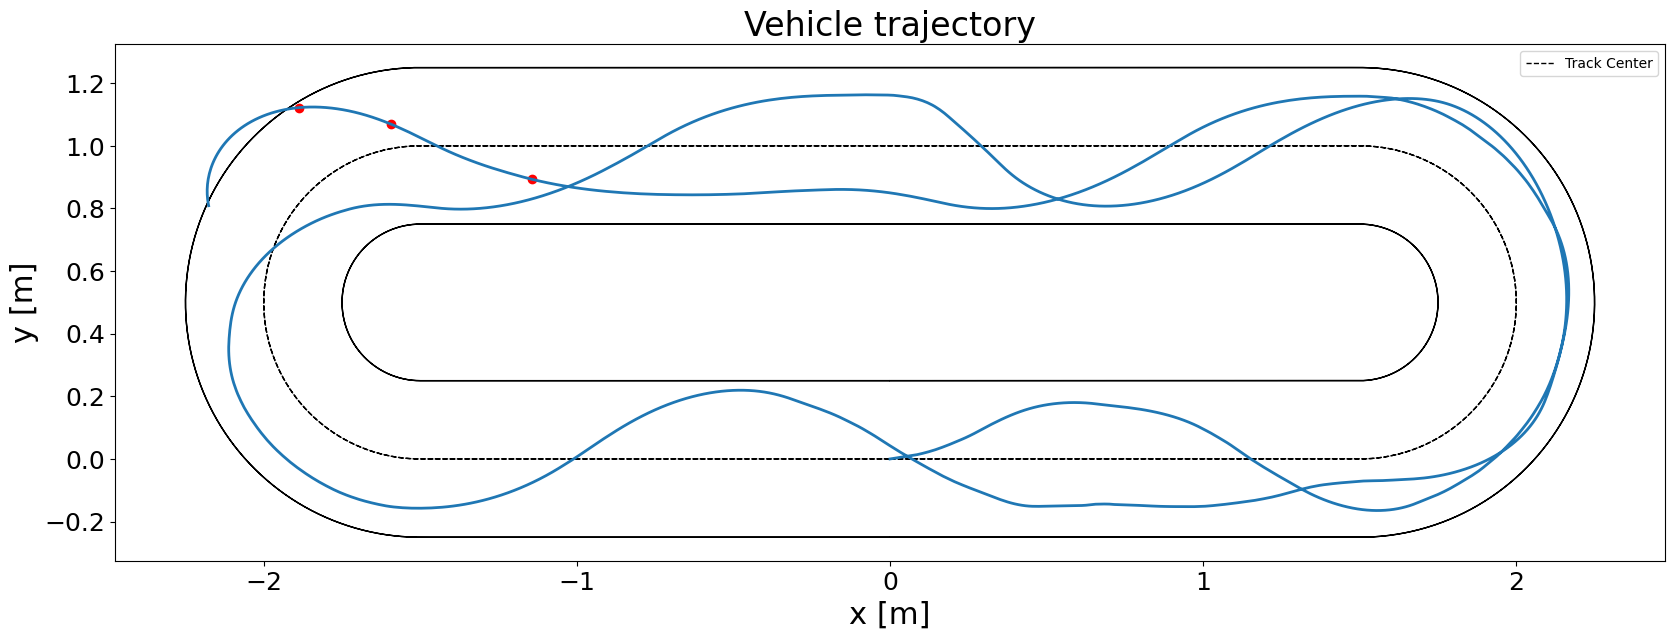

In [3]:
# plot global trajectory and track
random_seed = random_seeds[0]
n_rows, n_cols = len(filter_types), len(simulation_input_rules)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(20*n_rows,15*n_cols))
for i, j in product(range(n_rows), range(n_cols)):
    results = dict_results[(random_seed, track_filter_types[0], filter_types[i], simulation_input_rules[j])][0]
    if results is not None:
        results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator)
plt.show()
if save_fig:
    fig.savefig('track_simulation.png')

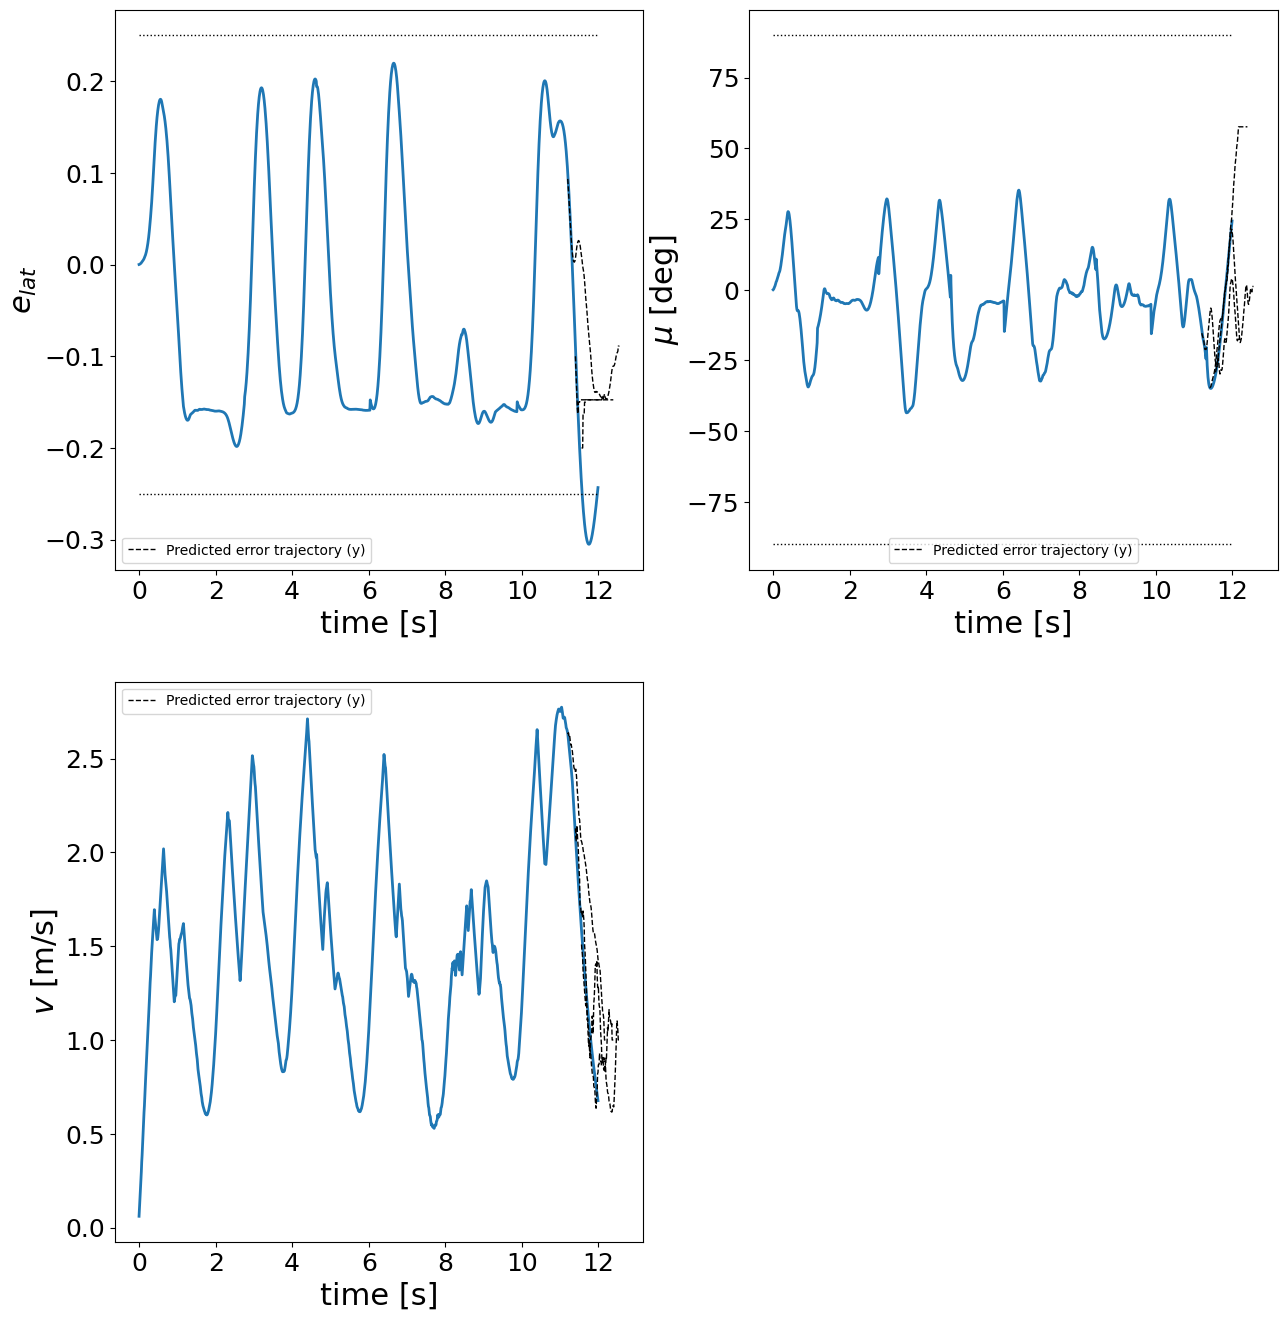

In [4]:
# choose one result to plot details
results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA, simulation_input_rules[0])][0]
# results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

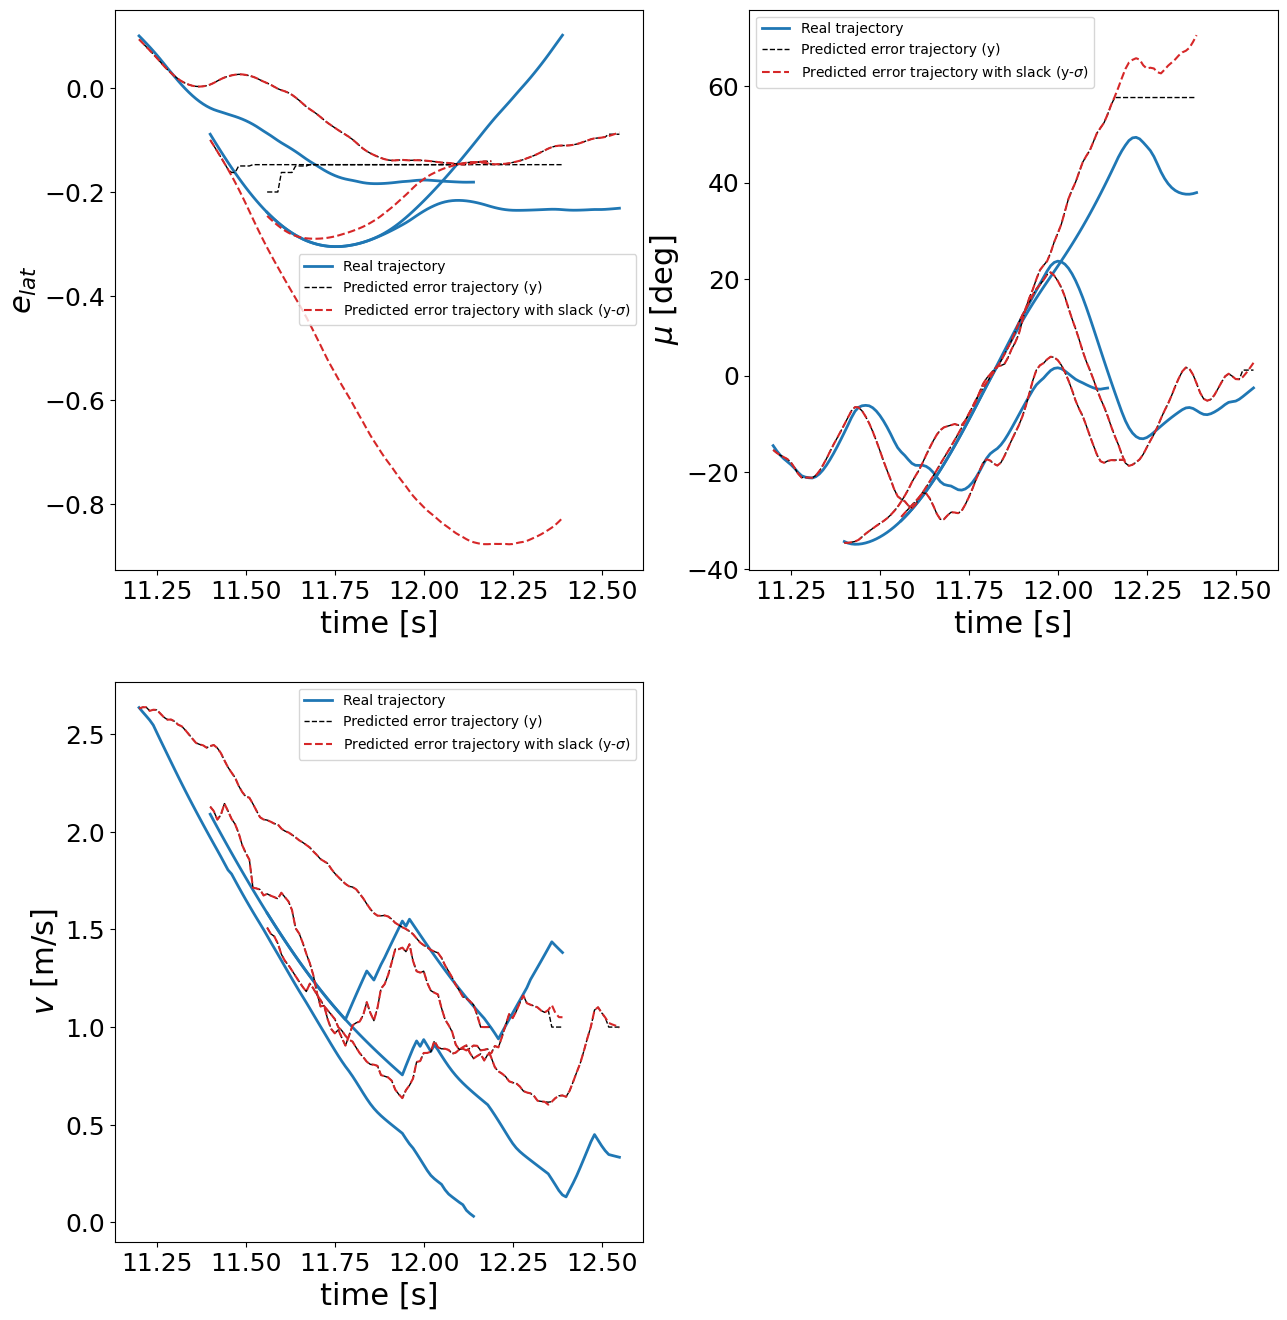

In [5]:
# plot given predicted trajectory and real trajectory
# plt.rcParams['text.usetex'] = True
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
time_spans = [(t-1, t) for t in results.violating_time_steps[0:1]]
# results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_error_slices(0, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(0, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(0, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
ax = plt.subplot(222)
# results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_error_slices(1, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(1, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(1, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
ax = plt.subplot(223)
# results.plot_error_trajectory(2, ax)
results.plot_error_slices(2, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(2, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(2, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
plt.show()

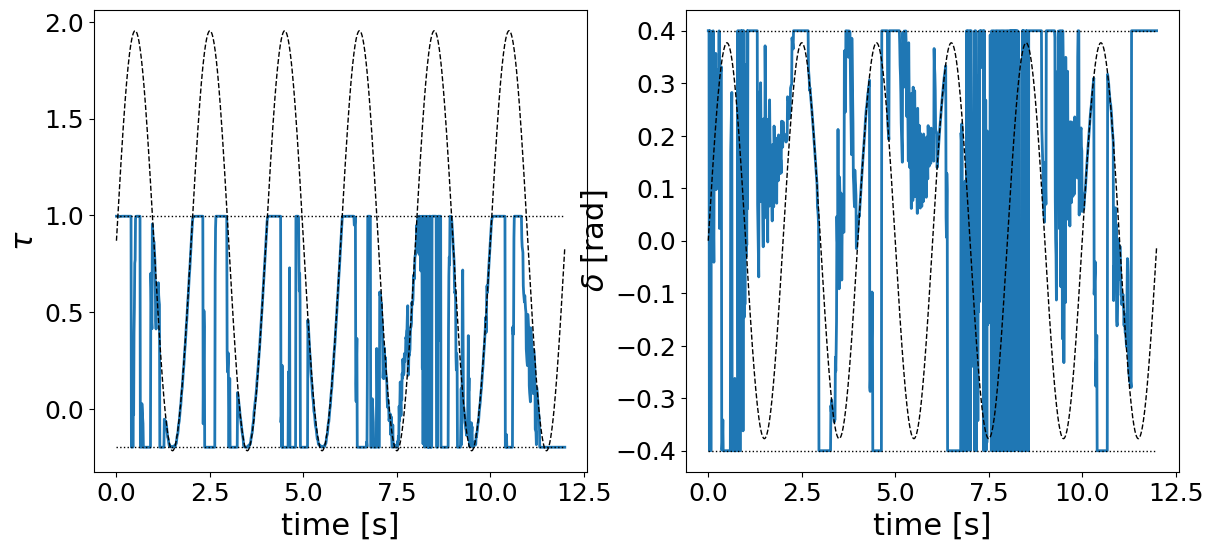

In [6]:
# plot given and applied inputs
plt.figure(figsize=(14,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
plt.show(block=True)

In [7]:
sigma_max = results.calculate_sigma_infty_value()
print(sigma_max)

(1.2867913980994794e-05, 1.3592008299274236)


In [8]:
sigma_max[1]/np.pi*180

77.87647106552016

In [9]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

{<SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: 'fix mu with\n weighting and add data'>: <tools.simualtion_results.Results object at 0x14dcb4730>}


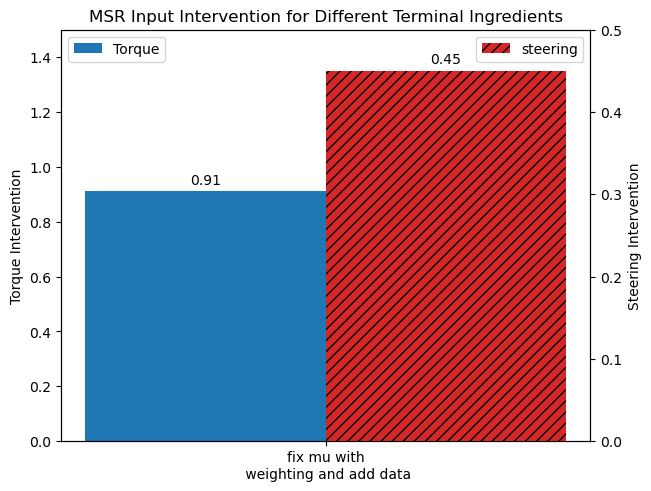

In [10]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)

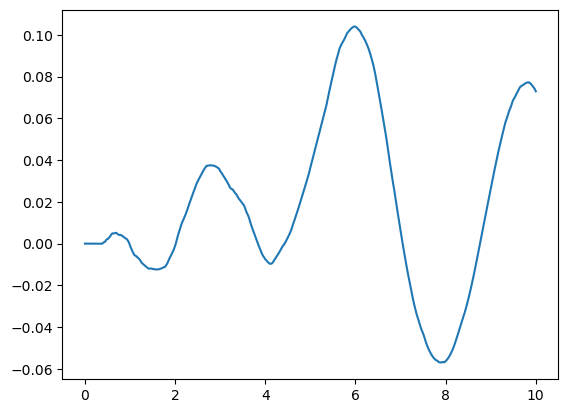

In [11]:
io_data = simulator.io_data_dict[1/0.5]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

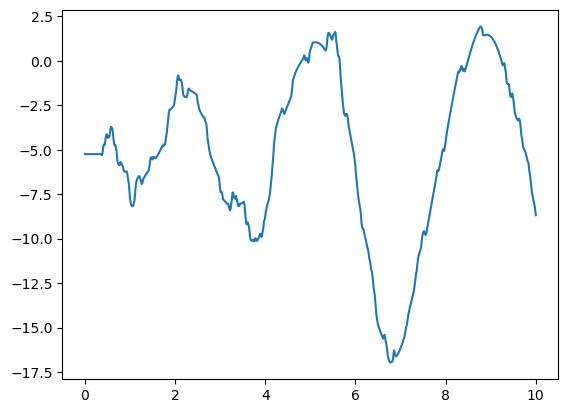

In [12]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

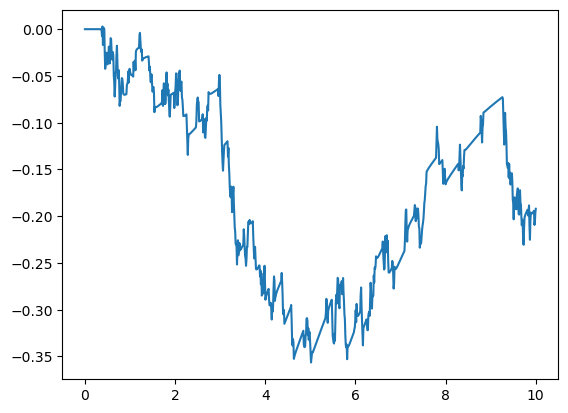

In [13]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

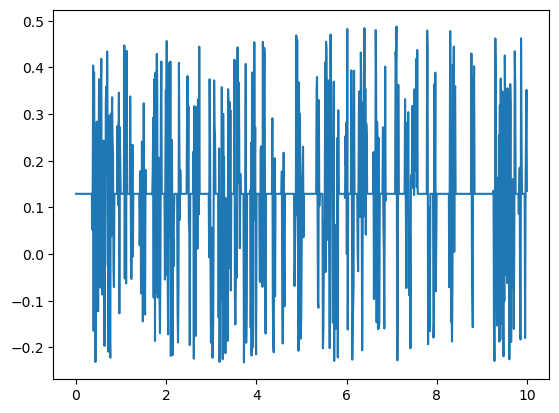

In [14]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

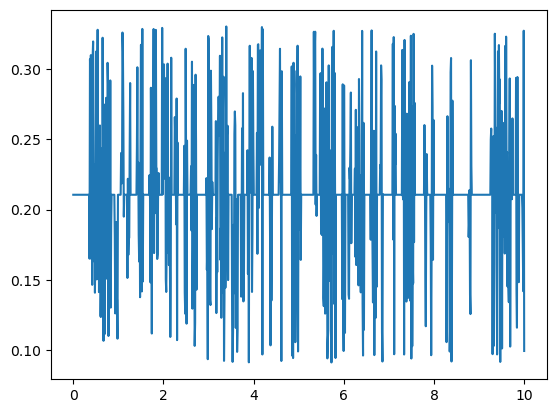

In [15]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[1,0] for u in io_data._input_data])

In [16]:
error_list = []
for predicted_traj, real_traj in zip(results._predicted_error_with_slack_slices, results._error_trajectory_slices):
    predicted_traj = predicted_traj[1] # extract trajectory
    real_traj = real_traj[1] # extract trajectory
    for predicted_state, real_state in zip(predicted_traj[:], real_traj[:]):
        error_list.append(predicted_state - real_state)

In [17]:
np.sqrt(np.sum([error[0]**2 for error in error_list])/len(error_list))

0.3265098763291047

In [18]:
i = 2
# print(simulator.systems[i].cur)
io_data_list = simulator.filter._safety_filters[i]._io_data_list
for io_data in io_data_list:
    print(len(io_data._input_data))

1000
188
144


In [19]:
import os
import pickle
# # curvature, sample time, [list of time length of io_datas]
# with open(os.path.join(os.getcwd(), 'datasets', f'io_data_random_2.0_0.01_160_240.pkl'), 'wb') as file:
#                         pickle.dump(io_data_list, file)

In [20]:
results._global_trajectory[885]

array([2.05263330e+00, 1.15578081e-01, 4.07430051e+02, 1.31774522e+00,
       1.46460799e-01, 3.60515754e+00])

In [21]:
results.mean_calculation_time

0.6474246108133344

In [22]:
print(len(simulator.buffer_u_value[0][1]))
print(simulator.buffer_u_value[0][1][0])
print(len(simulator.buffer_y_value[0][1]))
print(simulator.buffer_y_value[0][1][0])


100
[0.86994601 0.05565877]
100
[-0.15830183 -0.04127229  0.21862002  0.09307805]


In [23]:
# from scipy.spatial import ConvexHull, Voronoi
# H_uy = results.H_uy
# H_uy = np.array(H_uy.T)

# vor = Voronoi(H_uy)
# cov_hull = ConvexHull(H_uy)